# Import Libraries

In [1]:
!pip install celluloid

from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import combinations
from sklearn.decomposition import pca
from celluloid import Camera #animation
from IPython.display import HTML

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.decomposition import PCA
from numpy.linalg import eig
# plt.style.use('seaborn')

## Vectors

Text(0.5, 1.0, 'Vector in XY axis')

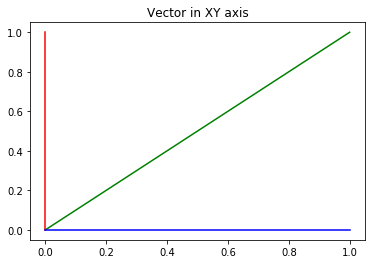

In [2]:
plt.plot([0,1],[0,1], color='green')
plt.plot([0,0],[0,1], color='red')
plt.plot([0,1],[0,0], color='blue')
plt.title("Vector in XY axis")

# Iris Dataset

In [3]:
data = datasets.load_iris()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df['class'] = data.target

In [6]:
iris = {0:'setosa',1:'versicolor',2:'virginica'}

In [7]:
df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [8]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
feature_combinations = [i for i in combinations(data.feature_names, 2)]

In [10]:
feature_combinations

[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

Text(0.5, 1.0, 'Dataset')

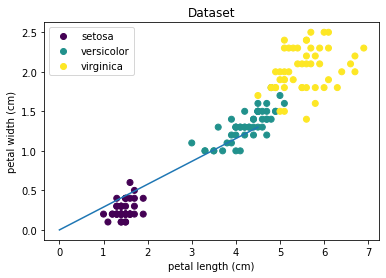

In [11]:
scatter = plt.scatter(df[feature_combinations[5][0]],df[feature_combinations[5][1]],c=df['class'])
plt.plot([0, df.loc[55][feature_combinations[5][0]]], [0, df.loc[55][feature_combinations[5][1]]])
plt.legend(handles=scatter.legend_elements()[0], labels = iris.values())
plt.xlabel(feature_combinations[5][0])
plt.ylabel(feature_combinations[5][1])
plt.title("Dataset")

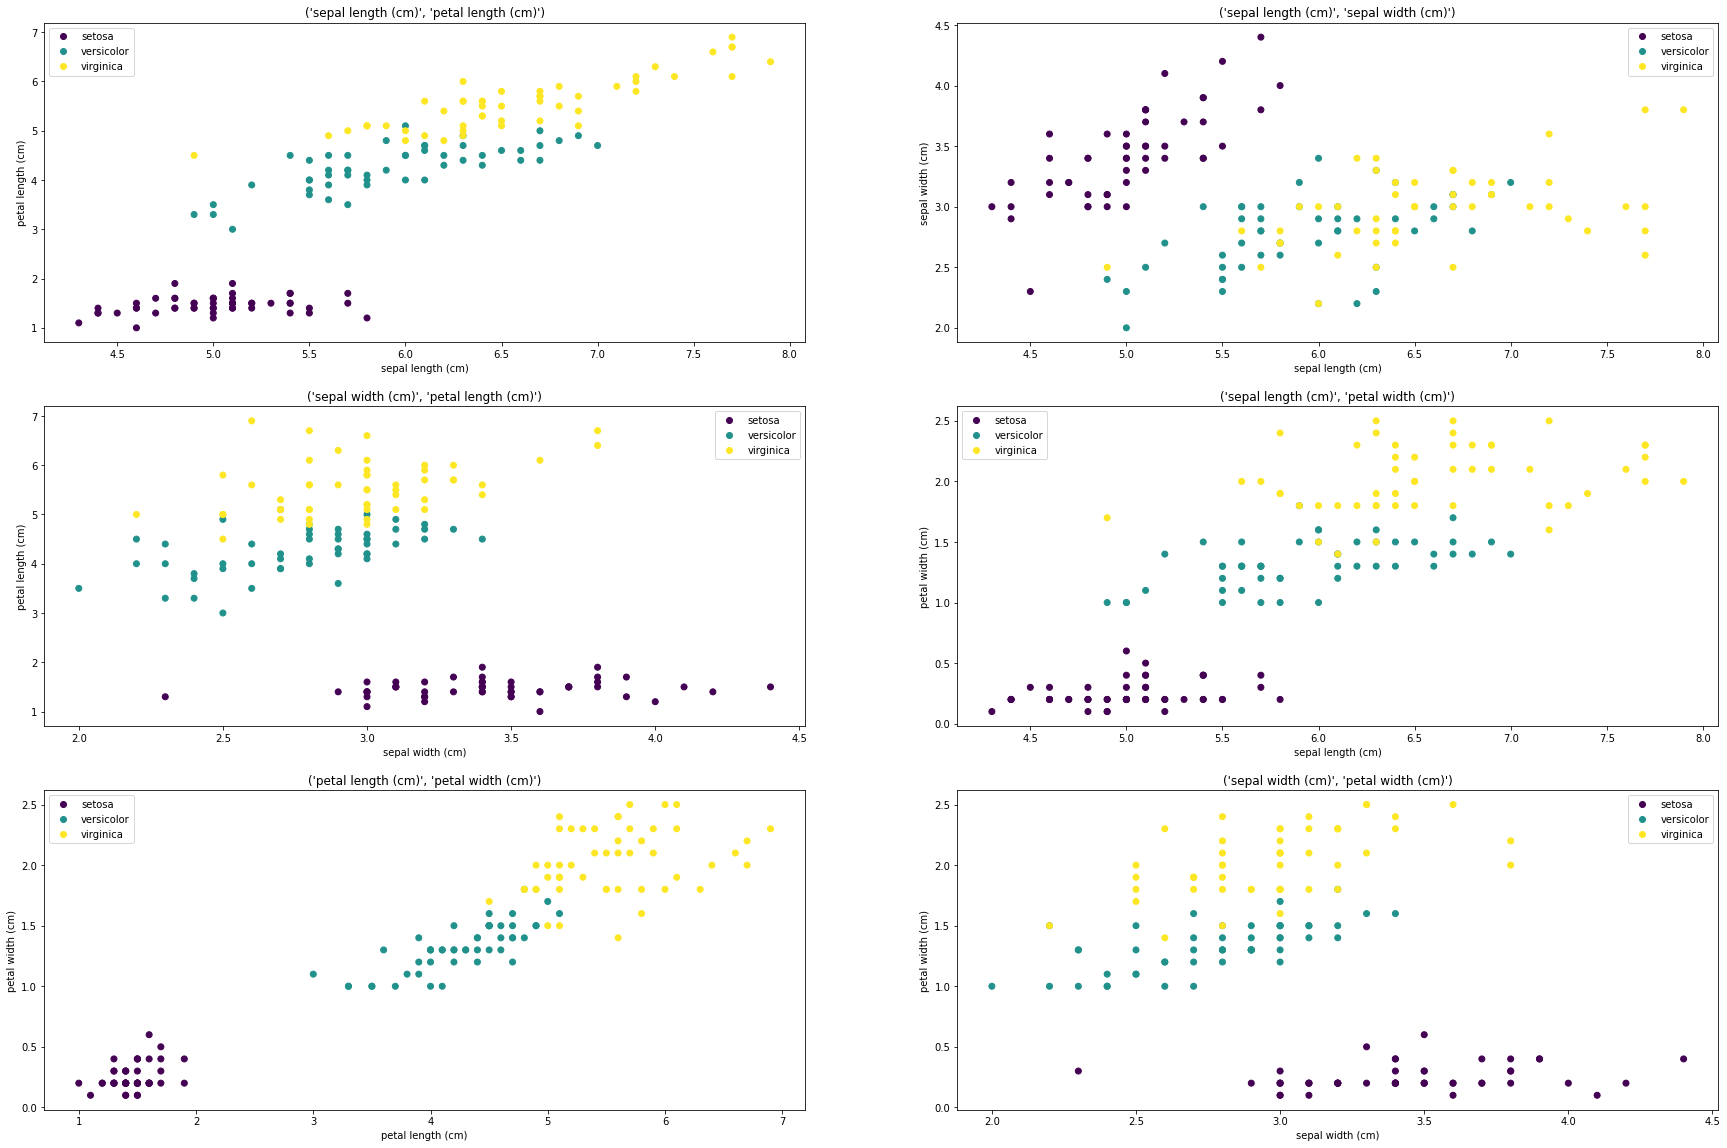

In [12]:
fig, axes = plt.subplots(int(len(feature_combinations)/2),2, figsize=(30,20))
for i in range(len(feature_combinations)):
    dim = pca.PCA(n_components = 2)
    dim.fit(df[list(feature_combinations[i])])
    axes[int(i/2),i%2-1].set_xlabel(feature_combinations[i][0])
    axes[int(i/2),i%2-1].set_ylabel(feature_combinations[i][1])
    axes[int(i/2),i%2-1].scatter(df[feature_combinations[i][0]], df[feature_combinations[i][1]], c=df['class'])
    axes[int(i/2),i%2-1].set_title(str(feature_combinations[i]))
    axes[int(i/2),i%2-1].legend(handles=scatter.legend_elements()[0], labels = iris.values())

## Matrix as a Linear Transformation

In [13]:
fig = plt.figure()
camera = Camera(fig)

<Figure size 432x288 with 0 Axes>

In [14]:
def y_coordinate(x): 
    return math.sqrt(1-(x*x))

In [15]:
def transform_datapoints(points, transformation_vector):
  return np.matmul(transformation_vector, points)

In [16]:
def find_distance(points, transformation_vector):
  mag = []
  for i in points.transpose():
    mag.append(np.matmul(i, i.transpose()))
  return np.sum(np.square(mag) - np.square(np.matmul(transformation_vector, points)))/points.shape[1]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


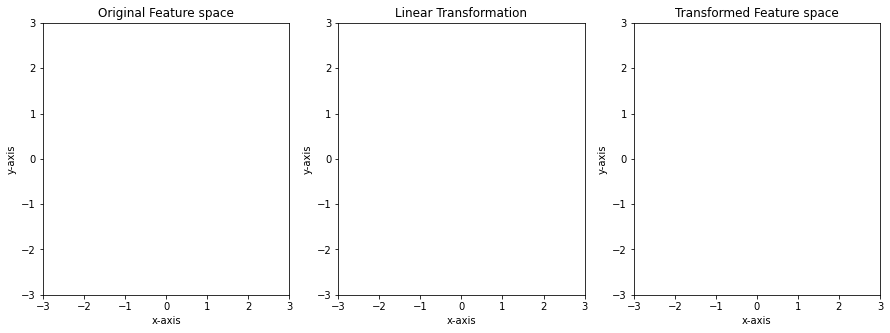

In [17]:
t = np.arange(1,-0.1,-0.1)

fig, axes = plt.subplots(1,3, figsize=(15,5))
camera = Camera(fig)

for i in t:

    axes[0].set_xlabel("x-axis")
    axes[0].set_ylabel("y-axis")
    axes[0].plot([0,1],[0,0], color='blue')
    axes[0].plot([0,0],[0,1], color='red')
    axes[0].plot([0,2],[0,2], color='green')
    axes[0].set_xlim(-3,3)
    axes[0].set_ylim(-3,3)
    axes[0].set_title("Original Feature space")
    
    x = i
    y = y_coordinate(i)
    
    axes[1].set_xlabel("x-axis")
    axes[1].set_ylabel("y-axis")
    axes[1].plot([0,x], [0,y], color='blue')
    axes[1].plot([0,-1*y],[0,x], color='red')
    transformed_points = np.matmul(np.array([[x,-1*y],[y,x]]), np.array([[2],[2]]))
    axes[1].plot([0,transformed_points[0]],[0,transformed_points[1]], color='green')
    axes[1].set_xlim(-3,3)
    axes[1].set_ylim(-3,3)
    axes[1].set_title("Linear Transformation")

    axes[2].set_xlabel("x-axis")
    axes[2].set_ylabel("y-axis")
    axes[2].plot([0,0],[0,1], color='blue')
    axes[2].plot([0,-1],[0,0], color='red')
    axes[2].plot([0,-2],[0,2], color='green')
    axes[2].set_xlim(-3,3)
    axes[2].set_ylim(-3,3)
    axes[2].set_title("Transformed Feature space")
        
    camera.snap()

animation = camera.animate()

HTML(animation.to_html5_video())

# Variance and Covariance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Variance in Petal Width')

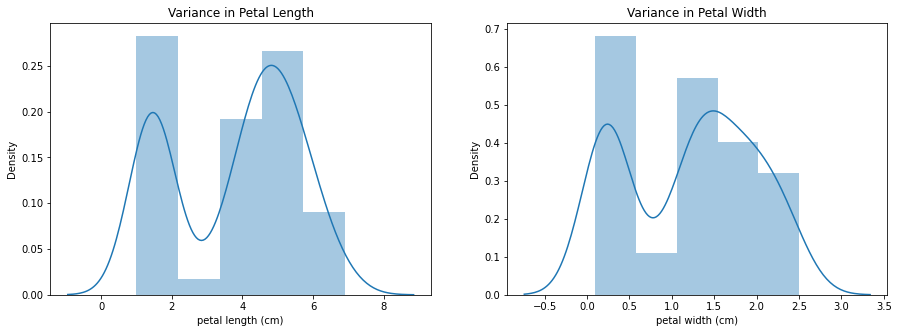

In [18]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_xlabel(feature_combinations[5][0])
sns.distplot(np.array(df[feature_combinations[5][0]]), ax=axes[0])
axes[0].set_title("Variance in Petal Length")

axes[1].set_xlabel(feature_combinations[5][1])
sns.distplot(np.array(df[feature_combinations[5][1]]), ax=axes[1])
axes[1].set_title("Variance in Petal Width")

In [19]:
covariance = np.cov(df[list(feature_combinations[5])].transpose())
print(covariance)

[[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]


# Eigen Values and Vectors

In [20]:
eig_values, eig_vectors = eig(covariance)
print("Eigen Values: ", eig_values)
print("Eigen Vectors: ",eig_vectors)

Eigen Values:  [3.66123805 0.03604607]
Eigen Vectors:  [[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]


In [24]:
np.array(df[list(feature_combinations[5])]).shape

(150, 2)

In [27]:
projected_points = np.matmul(eig_vectors[:,0].transpose(), np.array(df[list(feature_combinations[5])]).transpose())

Text(0.5, 1.0, 'Dataset projected onto the first eigen vector')

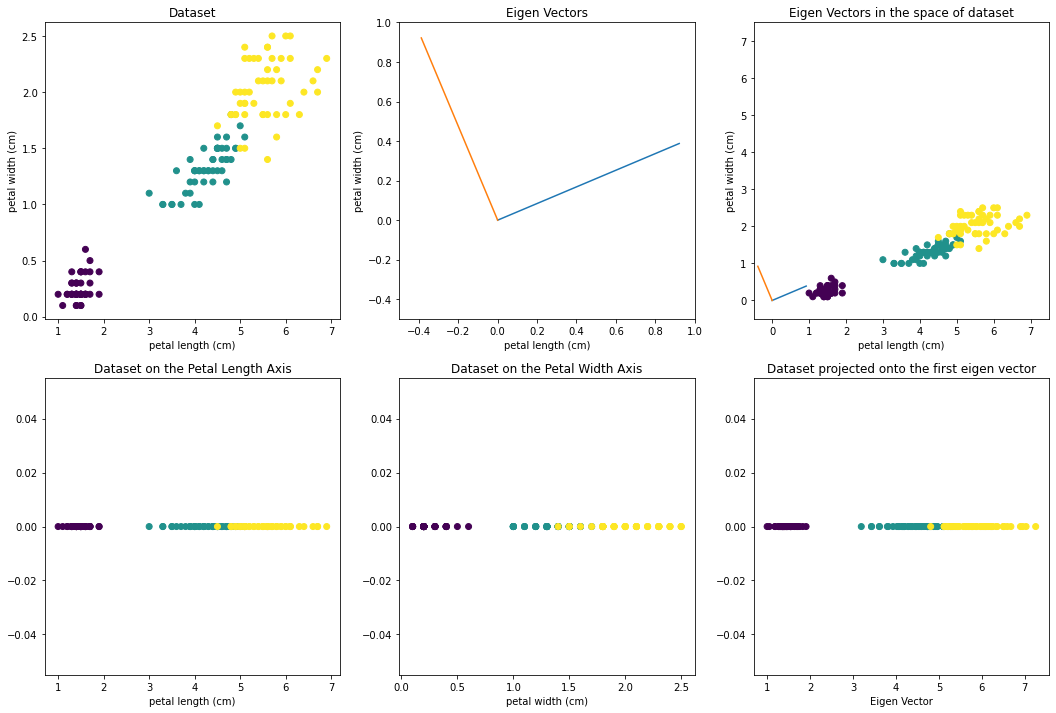

In [28]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

axes[0,0].set_xlabel(feature_combinations[5][0])
axes[0,0].set_ylabel(feature_combinations[5][1])
axes[0,0].scatter(df[feature_combinations[5][0]], df[feature_combinations[5][1]], c=df['class'])
axes[0,0].set_title("Dataset")

axes[0,1].set_xlabel(feature_combinations[5][0])
axes[0,1].set_ylabel(feature_combinations[5][1])
axes[0,1].set_xlim(-0.5,1)
axes[0,1].set_ylim(-0.5,1)
axes[0,1].plot([0,eig_vectors[0][0]],[0,eig_vectors[1][0]])
axes[0,1].plot([0,eig_vectors[0][1]],[0,eig_vectors[1][1]])
axes[0,1].set_title("Eigen Vectors")

axes[0,2].set_xlabel(feature_combinations[5][0])
axes[0,2].set_ylabel(feature_combinations[5][1])
axes[0,2].scatter(df[feature_combinations[5][0]], df[feature_combinations[5][1]], c=df['class'])
axes[0,2].plot([0,eig_vectors[0][0]],[0,eig_vectors[1][0]])
axes[0,2].plot([0,eig_vectors[0][1]],[0,eig_vectors[1][1]])
axes[0,2].set_xlim(-0.5,7.5)
axes[0,2].set_ylim(-0.5,7.5)
axes[0,2].set_title("Eigen Vectors in the space of dataset")

axes[1,0].set_xlabel(feature_combinations[5][0])
axes[1,0].scatter(np.array(df[feature_combinations[5][0]]), [0 for i in range(len(np.array(df[feature_combinations[5][0]])))], c=df['class'])
axes[1,0].set_title("Dataset on the Petal Length Axis")

axes[1,1].set_xlabel(feature_combinations[5][1])
axes[1,1].scatter(np.array(df[feature_combinations[5][1]]), [0 for i in range(len(np.array(df[feature_combinations[5][1]])))], c=df['class'])
axes[1,1].set_title("Dataset on the Petal Width Axis")

axes[1,2].set_xlabel("Eigen Vector")
axes[1,2].scatter(projected_points, [0 for i in range(len(projected_points))], c=df['class'])
axes[1,2].set_title("Dataset projected onto the first eigen vector")

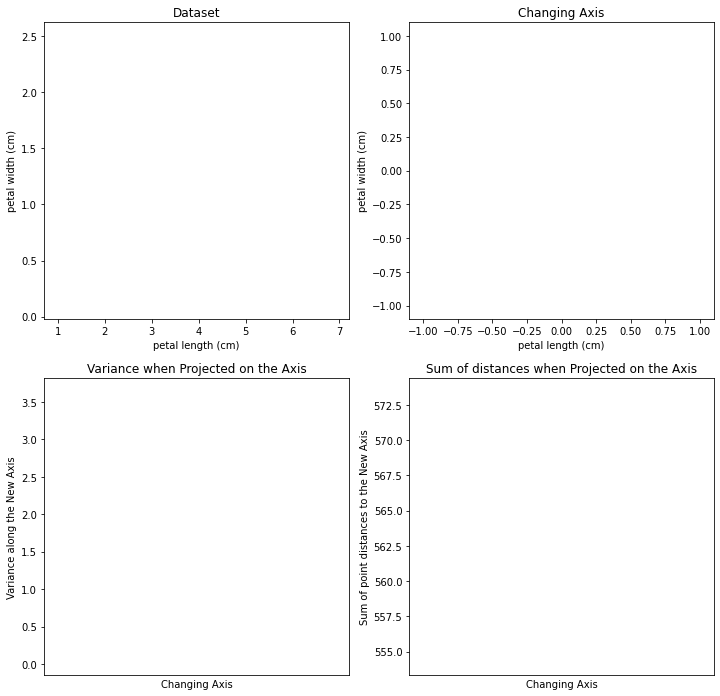

In [29]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
camera = Camera(fig)

t = np.arange(1,-1,-0.01)
variance_c = []
distance = []
for i in t:
    
    axes[0,0].set_xlabel(feature_combinations[5][0])
    axes[0,0].set_ylabel(feature_combinations[5][1])
    axes[0,0].scatter(df[feature_combinations[5][0]], df[feature_combinations[5][1]], c=df['class'])
    axes[0,0].set_title("Dataset")
    
    x = i
    y = y_coordinate(i)
    
    axes[0,1].plot([0,x], [0,-1*y], color='blue')
    axes[0,1].set_xlabel(feature_combinations[5][0])
    axes[0,1].set_ylabel(feature_combinations[5][1])
    axes[0,1].set_title("Changing Axis")

    transformed_c = transform_datapoints(np.array(df[list(feature_combinations[5])]).transpose(), np.array([x,-1*y]))
    variance_c.append(np.var(transformed_c))
    distance.append(find_distance(np.array(df[list(feature_combinations[5])]).transpose(), np.array([x,-1*y])))

    axes[1,0].plot([j for j in range(len(variance_c))], variance_c)
    axes[1,0].set_xticks([])
    axes[1,0].set_xlabel("Changing Axis")
    axes[1,0].set_ylabel("Variance along the New Axis")
    axes[1,0].set_title("Variance when Projected on the Axis")

    axes[1,1].plot([j for j in range(len(distance))], distance)
    axes[1,1].set_xticks([])
    axes[1,1].set_xlabel("Changing Axis")
    axes[1,1].set_ylabel("Sum of point distances to the New Axis")
    axes[1,1].set_title("Sum of distances when Projected on the Axis")

    
    camera.snap()


t = np.arange(-1,1,0.01)
for j,i in enumerate(t):

    axes[0,0].set_xlabel(feature_combinations[5][0])
    axes[0,0].set_ylabel(feature_combinations[5][1])
    axes[0,0].scatter(df[feature_combinations[5][0]], df[feature_combinations[5][1]], c=df['class'])
    
    x = i
    y = y_coordinate(i)
    
    axes[0,1].plot([0,x], [0,y], color='blue')
    axes[0,1].set_xlabel(feature_combinations[5][0])
    axes[0,1].set_ylabel(feature_combinations[5][1])

    transformed_c = transform_datapoints(np.array(df[list(feature_combinations[5])]).transpose(), np.array([x,y]))
    variance_c.append(np.var(transformed_c))
    distance.append(find_distance(np.array(df[list(feature_combinations[5])]).transpose(), np.array([x,y])))

    axes[1,0].plot([j for j in range(len(variance_c))], variance_c)
    axes[1,0].set_xticks([])
    axes[1,0].set_xlabel("Changing Axis")
    axes[1,0].set_ylabel("Variance along the New Axis")

    axes[1,1].plot([j for j in range(len(distance))], distance)
    axes[1,1].set_xticks([])
    axes[1,1].set_xlabel("Changing Axis")
    axes[1,1].set_ylabel("Sum of point distances to the New Axis")
    
    camera.snap()

animation = camera.animate(interval=10)
HTML(animation.to_html5_video())

In [30]:
pca = PCA().fit(np.array(df[list(feature_combinations[5])]))
print(pca.components_)
print(pca.explained_variance_)

[[ 0.92177769  0.38771882]
 [-0.38771882  0.92177769]]
[3.66123805 0.03604607]


In [31]:
print(eig_vectors)
print(eig_values)

[[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]
[3.66123805 0.03604607]


# Decomposition of Covariance Matrix

In [32]:
R = eig_vectors
L = np.diag(eig_values)
S = np.sqrt(L)

In [33]:
print(R)
print(L)
print(S)

[[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]
[[3.66123805 0.        ]
 [0.         0.03604607]]
[[1.91343619 0.        ]
 [0.         0.18985803]]


In [34]:
covariance

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [35]:
print(np.matmul(np.matmul(R,L), R.transpose()))

[[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]


In [36]:
print(np.matmul(np.matmul(R,S), np.matmul(S,R.transpose())))

[[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]


In [37]:
arr = np.array(df[list(feature_combinations[5])])

In [38]:
np.mean(arr[:,0]), np.mean(arr[:,1])

(3.7580000000000005, 1.1993333333333336)

In [39]:
x = np.random.normal(np.mean(arr[:,0]), 1, 150)
y = np.random.normal(np.mean(arr[:,1]), 1, 150)
white_data = np.vstack((x, y)).T

white_data.shape

(150, 2)

In [40]:
np.cov(white_data.transpose())

array([[0.91445314, 0.03422298],
       [0.03422298, 0.9911728 ]])

In [41]:
transformed_white_data = np.matmul(np.matmul(R,S), white_data.transpose())

Text(0.5, 1.0, 'Actual Dataset')

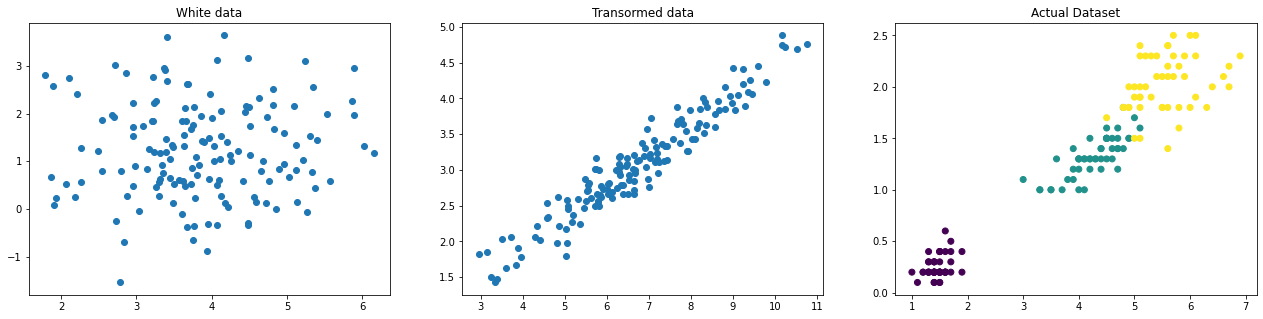

In [43]:
fig, axes = plt.subplots(1,3, figsize=(22,5))

axes[0].scatter(white_data[:,0], white_data[:,1])
axes[0].set_title("White data")

axes[1].scatter(transformed_white_data[0], transformed_white_data[1])
axes[1].set_title("Transormed data")

axes[2].scatter(df[feature_combinations[5][0]], df[feature_combinations[5][1]], c=df['class'])
axes[2].set_title("Actual Dataset")